In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import fft
import wave
import sys
import os
from scipy.io.wavfile import write
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.io import wavfile
import scipy.signal as signal
import librosa


In [2]:
path = 'C:/Users/User/Desktop/AppStat/MachineLearning/AppliedML2024/final_project/data/nsynth-valid/audio/'

In [3]:
def read_wav_file(filename):
    with wave.open(filename, 'rb') as wf:
        params = wf.getparams()
        num_channels, sampwidth, framerate, num_frames = params[:4]
        frames = wf.readframes(num_frames)
        waveform = np.frombuffer(frames, dtype=np.int16)
    return waveform, params

def read_wav_file_scipy(filename):
    framerate, waveform = wavfile.read(filename)
    return waveform, framerate

def plot_waveform(waveform, framerate):
    # Create a time array in seconds
    time_array = np.arange(0, len(waveform)) / framerate
    plt.figure(figsize=(15, 5))
    plt.plot(time_array, waveform, label="Waveform")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.legend()
    plt.show()

def read_files_in_dir(directory):
    filenames = os.listdir(directory)
    return filenames

def pick_5_samples(arrays):
    instruments = []
    for array in arrays:
        pick = np.random.choice(array, 1)
        instruments.append(pick)
    return instruments

def pick_samples_and_classify(arrays):
    #Picks a random number of samples, and returns their filepath and label
    instruments = []
    #pick at minimum two instruments
    number_of_instruments = np.random.randint(2, len(arrays) + 1)
    labels = np.zeros(len(arrays))
    already_picked = []

    while len(instruments) < number_of_instruments:
        random_pick = np.random.randint(0, len(arrays))
        if random_pick in already_picked:
            break
        else:
            already_picked.append(random_pick)
            pick = np.random.choice(arrays[random_pick], 1)
            instruments.append(pick)
            labels[random_pick] = 1

    return instruments, labels
#read the filenames, and add their data to 5 lists
def add_waveform_to_list(filenames):
    waveforms = []
    for filename in filenames:
        waveform, params = read_wav_file_scipy(path + filename[0])
        waveforms.append(waveform)
    return waveforms

def read_wav_file(filename):
    with wave.open(filename, 'rb') as wf:
        params = wf.getparams()
        num_channels, sampwidth, framerate, num_frames = params[:4]
        frames = wf.readframes(num_frames)
        waveform = np.frombuffer(frames, dtype=np.int16)
    return waveform, params

def read_wav_file_scipy(filename):
    framerate, waveform = wavfile.read(filename)
    return waveform, framerate

def plot_waveform(waveform, framerate):
    # Create a time array in seconds
    time_array = np.arange(0, len(waveform)) / framerate
    plt.figure(figsize=(15, 5))
    plt.plot(time_array, waveform, label="Waveform")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.legend()
    plt.show()

def read_files_in_dir(directory):
    filenames = os.listdir(directory)
    return filenames


def pick_5_samples(arrays):
    instruments = []
    for array in arrays:
        pick = np.random.choice(array, 1)
        instruments.append(pick)
    return instruments

def pick_samples_and_classify(arrays):
    #Picks a random number of samples, and returns their filepath and label
    instruments = []
    #pick at minimum two instruments
    number_of_instruments = np.random.randint(2, len(arrays) + 1)
    labels = np.zeros(len(arrays))
    already_picked = []

    while len(instruments) < number_of_instruments:
        random_pick = np.random.randint(0, len(arrays))
        if random_pick in already_picked:
            break
        else:
            already_picked.append(random_pick)
            pick = np.random.choice(arrays[random_pick], 1)
            instruments.append(pick)
            labels[random_pick] = 1

    return instruments, labels
#read the filenames, and add their data to 5 lists
def add_waveform_to_list(filenames):
    waveforms = []
    for filename in filenames:
        waveform, params = read_wav_file_scipy(path + filename[0])
        waveforms.append(waveform)
    return waveforms
        
#Fast fourier transform
def fft_h(data, sample_rate):
    n = len(data)
    fft_data = np.fft.fft(data)
    freq = np.fft.fftfreq(n, d=1/sample_rate)
    return freq[:n//2], np.abs(fft_data[:n//2])

def normalize_waveform(waveform):
    return waveform

def combine_waveforms(waveforms):

    normalization =  1 / len(waveforms)
    out = np.zeros_like(waveforms[0], dtype=np.float32)
    for w in waveforms:
        out += w.astype(np.float32) * normalization
    return out # note, this retuns a float32 array - it is needed to convert this to int16 before saving it to a wav file
def waveform_to_wavfile(waveform, name_string, sample_rate = 16000):
    write(name_string, sample_rate, waveform.astype(np.int16))

def gen_combo_waveform():
    paths, label = pick_samples_and_classify([bass, guitar, flutes, keyboards])
    waveforms = add_waveform_to_list(paths)
    return combine_waveforms(waveforms), label, paths

def read_wav_file(filename):
    with wave.open(filename, 'rb') as wf:
        params = wf.getparams()
        num_channels, sampwidth, framerate, num_frames = params[:4]
        frames = wf.readframes(num_frames)
        waveform = np.frombuffer(frames, dtype=np.int16)
    return waveform, params

def read_wav_file_scipy(filename):
    framerate, waveform = wavfile.read(filename)
    return waveform, framerate

def plot_waveform(waveform, framerate):
    # Create a time array in seconds
    time_array = np.arange(0, len(waveform)) / framerate
    plt.figure(figsize=(15, 5))
    plt.plot(time_array, waveform, label="Waveform")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.legend()
    plt.show()

def read_files_in_dir(directory):
    filenames = os.listdir(directory)
    return filenames


def pick_5_samples(arrays):
    instruments = []
    for array in arrays:
        pick = np.random.choice(array, 1)
        instruments.append(pick)
    return instruments

def pick_samples_and_classify(arrays):
    #Picks a random number of samples, and returns their filepath and label
    instruments = []
    #pick at minimum two instruments
    number_of_instruments = np.random.randint(2, len(arrays) + 1)
    labels = np.zeros(len(arrays))
    already_picked = []

    while len(instruments) < number_of_instruments:
        random_pick = np.random.randint(0, len(arrays))
        if random_pick in already_picked:
            break
        else:
            already_picked.append(random_pick)
            pick = np.random.choice(arrays[random_pick], 1)
            instruments.append(pick)
            labels[random_pick] = 1

    return instruments, labels
#read the filenames, and add their data to 5 lists
def add_waveform_to_list(filenames):
    waveforms = []
    for filename in filenames:
        waveform, params = read_wav_file_scipy(path + filename[0])
        waveforms.append(waveform)
    return waveforms
        
#Fast fourier transform
def fft_h(data, sample_rate):
    n = len(data)
    fft_data = np.fft.fft(data)
    freq = np.fft.fftfreq(n, d=1/sample_rate)
    return freq[:n//2], np.abs(fft_data[:n//2])

def normalize_waveform(waveform):
    return waveform

def combine_waveforms(waveforms):

    normalization =  1 / len(waveforms)
    out = np.zeros_like(waveforms[0], dtype=np.float32)
    for w in waveforms:
        out += w.astype(np.float32) * normalization
    return out # note, this retuns a float32 array - it is needed to convert this to int16 before saving it to a wav file
def waveform_to_wavfile(waveform, name_string, sample_rate = 16000):
    write(name_string, sample_rate, waveform.astype(np.int16))

def gen_combo_waveform():
    paths, label = pick_samples_and_classify([bass, guitar, flutes, keyboards])
    waveforms = add_waveform_to_list(paths)
    return combine_waveforms(waveforms), label, paths

def gen_data_set(N):
    data = []
    labels = []
    #paths = []
    for i in range(N):
        waveform, label, paths_f = gen_combo_waveform()
        f,t,zxx = signal.spectrogram(waveform)
      # _,_ ,zxx_path = signal.spectrogram(paths_f)
        data.append(zxx)
        labels.append(label)
        #f,t,zxx = signal.stft(waveform, fs=16000, nperseg=256)
    return data, labels

def gen_spectrogram_set_spectroy(N):
    data = []
    labels = []
    for i in range(N):
        paths, label = pick_samples_and_classify([bass, guitar, flutes, keyboards])
        waveforms = add_waveform_to_list(paths)
        freq, ts, spectro_data = signal.spectrogram(combine_waveforms(waveforms))

        inter_waveforms = []

        for waveform in waveforms:
            freq, ts, spectro = signal.spectrogram(waveform)
            inter_waveforms.append(spectro)
        
        data.append(spectro_data)
        labels.append(inter_waveforms)
    
    return data, labels
#Sorting the files in directory


filenames = read_files_in_dir(path)
#pianos = [filename for filename in filenames if "piano" in filename] #empty
bass = [filename for filename in filenames if "bass" in filename]
guitar = [filename for filename in filenames if "guitar" in filename]
#drum = [filename for filename in filenames if "drum" in filename] #empty
flutes = [filename for filename in filenames if "flute" in filename]
keyboards = [filename for filename in filenames if "keyboard" in filename] 
guitar_acoustic = [filename for filename in filenames if "guitar_acoustic" in filename]
flute_acoustic = [filename for filename in filenames if "flute_acoustic" in filename]
bass_electronic = [filename for filename in filenames if "bass_electronic" in filename]

In [4]:
print(len(flute_acoustic))

155


In [5]:
#Pick a random sample from each instrument list
waveforms = add_waveform_to_list(pick_5_samples([bass, guitar, flutes, keyboards]))




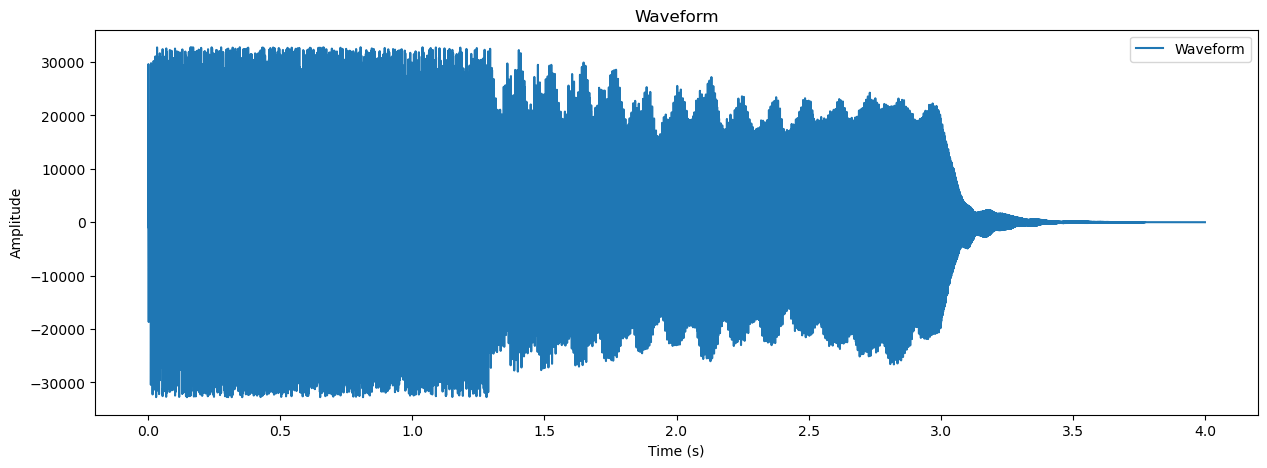

In [6]:
#Combine in a single list
combo = normalize_waveform(waveforms[0]) + normalize_waveform(waveforms[1]) +normalize_waveform(waveforms[2]) + normalize_waveform(waveforms[3])

sam_rate = 16000

plot_waveform(combo, sam_rate)


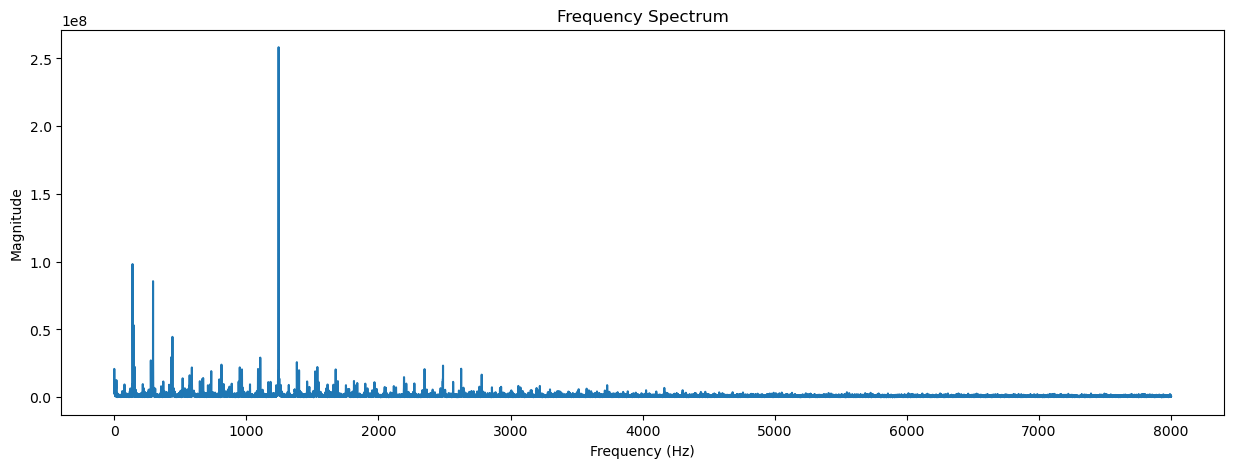

In [8]:
# Fast Fourier Transform (FFT) to convert the waveform to the frequency domain
def plot_fft(waveform, framerate):
    # Perform the FFT
    spectrum = fft.fft(waveform)
    freqs = fft.fftfreq(len(spectrum), 1 / framerate)
    # Plot the magnitude of the spectrum
    plt.figure(figsize=(15, 5))
    plt.plot(freqs[:len(freqs) // 2], np.abs(spectrum)[:len(freqs) // 2])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Frequency Spectrum')
    plt.show()

plot_fft(combo, sam_rate)


In [9]:
keybords_mask  = [filename for filename in filenames if "keyboard" in filename]
bass_mask = [filename for filename in filenames if "bass" in filename]
guitar_mask = [filename for filename in filenames if "guitar" in filename]



In [10]:

# combine the two masks
mask = keybords_mask + bass_mask + guitar_mask

In [10]:
# generate a datafile with the mask filenames and their labels, as an example 'keyboard_acoustic_004-034-075.wav', 'keyboard'
data = []
for filename in mask:
    label = filename.split('_')[0]
    data.append([filename, label])
df = pd.DataFrame(data, columns=['filename', 'label'])
df.to_csv('mask.csv', index=False)


In [11]:
# Convert the mask to frequency domain using FFT
import scipy.signal as signal
# using ShortTimeFFT to convert the waveform to the frequency domain


def read_wav_files(filenames):
    waveforms = []
    for filename in filenames:
        waveform, params = read_wav_file(data + filename)
        waveforms.append(waveform)
    return waveforms

def normalize_waveforms(waveforms):
    return [waveform / np.max(np.abs(waveform)) for waveform in waveforms]

def stft(waveform, framerate):
    f, t, Zxx = signal.stft(waveform, framerate, nperseg=1024)
    return f, t, Zxx

def plot_spectrogram(f, t, Zxx):
    plt.figure(figsize=(15, 5))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

waveforms = read_wav_files(mask)
waveforms = normalize_waveforms(waveforms)
f, t, Zxx = stft(waveforms[0], sam_rate)
plot_spectrogram(f, t, Zxx)


TypeError: can only concatenate list (not "str") to list

In [ ]:
# Train a simple neural network to classify the mask catagories using the STFT data as input
# Load the data
df = pd.read_csv('mask.csv')
filenames = df['filename']
labels = df['label']
waveforms = read_wav_files(filenames)

# Normalize the waveforms
waveforms = normalize_waveforms(waveforms)

# Convert the waveforms to the frequency domain
X = []
for waveform in waveforms:
    f, t, Zxx = stft(waveform, sam_rate)
    X.append(np.abs(Zxx))
X = np.array(X)

# Convert the labels to one-hot encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network
model = models.Sequential()
model.add(layers.Input(shape=(X.shape[1], X.shape[2])))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model implement early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])




Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5414 - loss: 0.9981 - val_accuracy: 0.6934 - val_loss: 0.6974
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7349 - loss: 0.6557 - val_accuracy: 0.7624 - val_loss: 0.5887
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8444 - loss: 0.4319 - val_accuracy: 0.7956 - val_loss: 0.4805
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8973 - loss: 0.3009 - val_accuracy: 0.8453 - val_loss: 0.3883
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9480 - loss: 0.1776 - val_accuracy: 0.8453 - val_loss: 0.3952
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9540 - loss: 0.1544 - val_accuracy: 0.8923 - val_loss: 0.3266
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9883 - loss: 0.0767 - val_accuracy: 0.8840 - val_loss: 0.3285
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9868 - loss: 0.0540 - val_accuracy: 0.

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9166 - loss: 0.5624
Loss: 0.5449233651161194, Accuracy: 0.9227373003959656


In [11]:


guitar = read_wav_file(path + 'guitar_acoustic_015-075-127.wav')[0]
keyboard = read_wav_file(path + 'keyboard_acoustic_004-045-025.wav')[0]
bass = read_wav_file(path + 'bass_electronic_018-029-075.wav')[0]
combo= combine_waveforms([keyboard, guitar, bass])
waveform_to_wavfile(combo,"combo.wav")


keyboard_acoustic_004-022-050.wav


In [ ]:
# Using the trained model to predict the mask of the mixed audio file
waveform, params = read_wav_file('combo.wav')
waveform = normalize_waveform(waveform)
f, t, Zxx = stft(waveform, sam_rate)
X = np.array([np.abs(Zxx)])
y_pred = model.predict(X)
y_pred = np.argmax(y_pred, axis=1)
label = label_encoder.inverse_transform(y_pred)
print(f'The predicted label is: {label[0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The predicted label is: keyboard


In [ ]:
#Using gen_data_set to generate a dataset of 1000 samples
data, labels = gen_data_set(1000)
data = np.array(data)
labels = np.array(labels)
data[9].shape




(129, 285)

In [ ]:
# Find the shape of 1 element in the data
data.shape


(1000, 129, 501)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
from scipy.signal import stft
from sklearn.metrics import f1_score
import tensorflow.keras.backend as K

#Using gen_data_set to generate a dataset of 1000 samples
# normalize the data with standard scaler
data, labels = gen_data_set(1000)
data = np.array(data)
labels = np.array(labels)
scaler = StandardScaler()
data = scaler.fit_transform(data.reshape(-1, data.shape[-1])).reshape(data.shape)


#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# use 2d convolutional layers to classify the audio samples in data into the labels in labels
model = models.Sequential()
model.add(layers.Input(shape=(129,285, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()




Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 127, 283, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 63, 141, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 61, 139, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 67, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 33, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 59136)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │     7,569,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,672,676 (29.27 MB)

 Trainable params: 7,672,676 (29.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 614ms/step - accuracy: 0.5269 - loss: 0.1569 - val_accuracy: 0.4437 - val_loss: 0.8963
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 514ms/step - accuracy: 0.4909 - loss: 0.1853 - val_accuracy: 0.4313 - val_loss: 0.8826
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 497ms/step - accuracy: 0.4686 - loss: 0.1627 - val_accuracy: 0.4500 - val_loss: 0.9355
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 499ms/step - accuracy: 0.5314 - loss: 0.1401 - val_accuracy: 0.4375 - val_loss: 0.9983
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 504ms/step - accuracy: 0.5143 - loss: 0.1022 - val_accuracy: 0.4313 - val_loss: 1.1366
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 510ms/step - accuracy: 0.4705 - loss: 0.1112 - val_accuracy: 0.4125 - val_loss: 1.0871
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 504ms/step - accuracy: 0.5338 - loss: 0.0925 - val_accuracy: 0.4500 - val_loss: 1.1504
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 514ms/step - accuracy: 0.5667 - loss: 0.0657 - 

In [ ]:
# add a dimension to the data
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

y_pred = model.predict(X_test)
print(np.round(y_pred[:10]))
print(y_test[:10])

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
[[1. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 0.]
 [1. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [1. 1. 0. 0.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [1. 0. 0. 1.]]


In [ ]:
def predict_instruments(wav_file, model, mlb):
    waveform, _ = read_wav_file(wav_file)
    #waveform = normalize_waveform(waveform)
    f, t, Zxx = stft(waveform, nperseg=1024)  # Adjust nperseg as necessary
    X = np.array([np.abs(Zxx)])
    y_pred = model.predict(X)[0]  # Get predictions for the first (and only) sample
    print("Predicted probabilities:", y_pred)
    threshold = 0.5  # Adjust as needed
    predicted_labels = mlb.classes_[y_pred > threshold]  # Select labels above the threshold
    return predicted_labels.tolist()  # Convert to list for consistent output format

# Predict the instruments in the mixed audio file
predicted_labels = predict_instruments('combo.wav', model, mlb)
print(f'The predicted labels are: {predicted_labels}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted probabilities: [0. 0. 1.]
The predicted labels are: ['keyboard']


In [ ]:
# Predict the instruments in the mixed audio file
predicted_labels = predict_instruments('combo.wav', model, mlb)
print(f'The predicted labels are: {predicted_labels}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The predicted labels are: [('keyboard',)]


### Unet approach


In [4]:
import numpy as np

def audio_to_waveform(audio):
    waveform, sr = librosa.load(audio, sr=None)
    return waveform, sr

def waveform_to_spectogram(waveform):
    if waveform.dtype != np.float32:
        waveform = waveform.astype(np.float32)
    spectrogram = librosa.stft(waveform)
    return np.abs(spectrogram)

def pad_spectrogram(spec, target_shape):
    padded_spec = np.zeros(target_shape,dtype = np.float32)
    min_shape = np.minimum(target_shape, spec.shape)
    padded_spec[:min_shape[0], :min_shape[1]] = spec[:min_shape[0], :min_shape[1]]
    return padded_spec

def spectogram_to_audio(spectrogram, sr,output_wav):
    waveform = librosa.istft(spectrogram)
    waveform = np.nan_to_num(waveform)
    waveform = waveform/np.max(np.abs(waveform))
    return write(output_wav, sr, (waveform*32767).astype(np.int16))


def normalize_spectrogram(spectrogram):
    min_val = np.min(spectrogram)
    max_val = np.max(spectrogram)
    normalized_spectrogram = (spectrogram - min_val) / (max_val - min_val + 1e-6)
    return normalized_spectrogram

def pick_samples_and_classify(arrays):
    #Picks a random number of samples, and returns their filepath and label
    instruments = []
    #pick at minimum two instruments
    number_of_instruments = 2
    #np.random.randint(2, len(arrays) + 1)
    labels = np.zeros(len(arrays))
    already_picked = []

    while len(instruments) < number_of_instruments:
        random_pick = np.random.randint(0, len(arrays))
        if random_pick in already_picked:
            break
        else: 
            already_picked.append(random_pick)
            pick = np.random.choice(arrays[random_pick], 1)
            instruments.append(pick)
            labels[random_pick] = 1

    return instruments, labels

        
        

#read the filenames, and add their data to 5 lists
def add_waveform_to_list(filenames):
    waveforms = []
    for filename in filenames:
        waveform, params = audio_to_waveform(path + filename[0])
        waveforms.append(waveform)
    return waveforms

def find_longest_array(arrays):
    longest = 0
    for array in arrays:
        if len(array) > longest:
            longest = len(array)
    return longest

def combine_waveforms(waveforms):
    normalization = 1 / len(waveforms)
    # changed to be equal to the length of the longest waveform
    out = np.zeros(find_longest_array(waveforms), dtype=np.float32)
    for w in waveforms:
        out += w.astype(np.float32) * normalization
    return out # note, this retuns a float32 array - it is needed to convert this to int16 before saving it to a wav file

def gen_waveform_sequence(sequence_length):
    out = []

    for i in range(sequence_length):
        paths, label = pick_samples_and_classify([bass, guitar, flutes, keyboards])
        waveforms = add_waveform_to_list(paths)
        out.append(combine_waveforms(waveforms))

    return np.concatenate(out, axis=0)


In [81]:
sequence = gen_waveform_sequence(5)
waveform_to_wavfile(sequence, 'sequence.wav')

In [5]:
def nu_gen_spectro(N, target_shape=(1025, 126)):
    data = []
    labels = []
    original_labels = []
    #instrument_list = [bass, guitar, flutes]
    instrument_list = [bass_electronic, flute_acoustic]

    for i in range(N):
        paths, label = pick_samples_and_classify(instrument_list)
        original_labels.append(label)
        waveforms = add_waveform_to_list(paths)
        mixed_waveform = combine_waveforms(waveforms)
        
        #audio = audio_to_waveform(mixed_waveform)
        mixed_spectro = waveform_to_spectogram(mixed_waveform)
        #mixed_spectro = audio_to_spectrogram(mixed_waveform)
        mixed_spectro_padded = pad_spectrogram(mixed_spectro, target_shape)
        mixed_spectro_normalized = normalize_spectrogram(mixed_spectro_padded)
        
        inter_waveforms = []
        

        inst_i = 0
        for n, i in enumerate(label):
            if i == 1:
                spectro = waveform_to_spectogram(waveforms[inst_i])
                spectro_padded = pad_spectrogram(spectro, target_shape)
                inter_waveforms.append(spectro_padded)
                
                inst_i += 1

            if i == 0:
                inter_waveforms.append(np.zeros(target_shape))

        data.append(mixed_spectro_normalized)
        #inter_waveforms.append(np.zeros(target_shape))
        labels.append(inter_waveforms)
    
    data = np.array(data)
    
    return data, np.array(labels), np.array(original_labels)# remove last line if you want to return only data and labels
    

In [27]:
target_shape = (1025, 126)
N = 500  # Number of samples


data, labels, original_labels = nu_gen_spectro(N, target_shape)

print(np.shape(data))  # Should be (N, 1025, 128)
print(np.shape(labels))
#print(np.shape(piano_labels))


(500, 1025, 126)
(500, 2, 1025, 126)


In [92]:
original_labels

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       ...,
       [0., 1.],
       [1., 1.],
       [0., 1.]])

In [46]:
def check_data(original_labels,y_train):
    for n in range(len(y_train)):
        for i in range(len(y_train[n])):
            if np.mean(y_train[n][i]) != 0:
                if original_labels[n][i] != 1:
                    print("Error")
            if np.mean(y_train[n][i]) == 0:
                if original_labels[n][i] != 0:
                    print("Error")

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split


def reset_cuda_memory():
    # Print memory usage before reset
    print("Before reset:")
    print(f"Allocated memory: {torch.cuda.memory_allocated()}")
    print(f"Reserved memory: {torch.cuda.memory_reserved()}")

    # Reset PyTorch memory allocator
    torch.cuda.reset_peak_memory_stats()
    torch.cuda.reset_accumulated_memory_stats()

    # Clear cache
    torch.cuda.empty_cache()

    # Synchronize to ensure all operations are complete
    torch.cuda.synchronize()

    # Print memory usage after reset
    print("After reset:")
    print(f"Allocated memory: {torch.cuda.memory_allocated()}")
    print(f"Reserved memory: {torch.cuda.memory_reserved()}")

# Call the function to reset CUDA memory
reset_cuda_memory()


Before reset:
Allocated memory: 0
Reserved memory: 0
After reset:
Allocated memory: 0
Reserved memory: 0


In [44]:
# Write a multi-source audio seperation function using a unet model from torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

class AudioDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


class UNet(nn.Module):
    def __init__(self, input_channels=1, output_channels=2):
        super(UNet, self).__init__()

        # Define the contracting/downsampling path
        self.conv1 = nn.Conv2d(input_channels, 8, (3,125), padding=(1,62)) # (3,125), padding=(1,62).
        self.bn1 = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.dropout = nn.Dropout(0.2)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.conv7 = nn.Conv2d(256, 512, 3, padding=1)
        self.bn7 = nn.BatchNorm2d(512)
        self.pool = nn.MaxPool2d(2, 2)

        # Add transpose convolutional layers for upsampling
        self.upconv1 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.conv8 = nn.Conv2d(512, 256, 3, padding=1)
        self.upconv2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.conv9 = nn.Conv2d(256, 128, 3, padding=1)
        self.upconv3 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.conv10 = nn.Conv2d(128, 64, 3, padding=1)
        self.upconv4 = nn.ConvTranspose2d(64, 32, 2, stride=2)
        self.conv11 = nn.Conv2d(64, 32, 3, padding=1)
        self.upconv5 = nn.ConvTranspose2d(32, 16, 2, stride=2)
        self.conv12 = nn.Conv2d(32, 16, 3, padding=1)
        self.upconv6 = nn.ConvTranspose2d(16, 8, 2, stride=2)
        self.conv13 = nn.Conv2d(16, 8, 3, padding=1)
        self.final_conv = nn.Conv2d(8, output_channels, 3,padding = 1)

    def forward(self, x):
        # Contracting path
        x = self.dropout(x)
        x1 = nn.functional.relu(self.bn1(self.conv1(x)))
        x2 = self.pool(nn.functional.relu(self.bn2(self.conv2(x1))))
        x3 = self.pool(nn.functional.relu(self.bn3(self.conv3(x2))))
        x4 = self.pool(nn.functional.relu(self.bn4(self.conv4(x3))))
        x5 = self.pool(nn.functional.relu(self.bn5(self.conv5(x4))))
        x6 = self.pool(nn.functional.relu(self.bn6(self.conv6(x5))))
        x7 = self.pool(nn.functional.relu(self.bn7(self.conv7(x6))))
        # Print sizes for debugging
        #print(f"x1 shape: {x1.shape}")
        #print(f"x2 shape: {x2.shape}")
        #print(f"x3 shape: {x3.shape}")
        #print(f"x4 shape: {x4.shape}")
        #print(f"x5 shape: {x5.shape}")
        #print(f"x6 shape: {x6.shape}")
        #print(f"x7 shape: {x7.shape}")
        x = self.upconv1(x7)
        x = F.interpolate(x, size=(x6.size(2), x6.size(3)), mode='nearest')
    
        #print(f"x shape before concatenation: {x.shape}")
        x = torch.cat([x, x6], dim=1)
        #print(f"x shape after concatenation: {x.shape}")
        x = nn.functional.relu(self.conv8(x))

        x = self.upconv2(x)
        x = F.interpolate(x, size=(x5.size(2), x5.size(3)), mode='nearest')
   
        #print(f"x shape before concatenation: {x.shape}")
        x = torch.cat([x, x5], dim=1)
        #print(f"x shape after concatenation: {x.shape}")
        x = nn.functional.relu(self.conv9(x))

        x = self.upconv3(x)
        x = F.interpolate(x, size=(x4.size(2), x4.size(3)), mode='nearest')
        #print(f"x shape before concatenation: {x.shape}")
        x = torch.cat([x, x4], dim=1)
        #print(f"x shape before concatenation: {x.shape}")
        x = nn.functional.relu(self.conv10(x))
        
        x = self.upconv4(x)
        x = F.interpolate(x, size=(x3.size(2), x3.size(3)), mode='nearest')
        #print(f"x2_interp shape: {x3.shape}")
        #print(f"x shape before concatenation: {x.shape}")
    
        x = torch.cat([x, x3], dim=1)
        #print(f"x shape before concatenation: {x.shape}")
        x = nn.functional.relu(self.conv11(x))

        x = self.upconv5(x)
        x = F.interpolate(x, size=(x2.size(2), x2.size(3)), mode='nearest')
        #print(f"x shape before concatenation: {x.shape}")
        x = torch.cat([x, x2], dim=1)
        #print(f"x shape before concatenation: {x.shape}")
        x = nn.functional.relu(self.conv12(x))


        x = self.upconv6(x)
        #print(f'upconv6 shape: {x.shape}')
        x = F.interpolate(x, size=(x1.size(2), x1.size(3)), mode='nearest')
        x = torch.cat([x, x1], dim=1)
        x = F.relu(self.conv13(x))
        
        x = self.final_conv(x)

        return x


In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from torch.cuda.amp import autocast, GradScaler
class AudioDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


class UNet_time(nn.Module):
    def __init__(self, input_channels=1, output_channels=2):
        super(UNet_time, self).__init__()

        # Define the contracting/downsampling path with 2D convolutions
        self.conv1 = nn.Conv2d(input_channels, 8, (3,125), padding=(1,62))
        self.bn1 = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3), padding=(1, 1))
        self.bn2 = nn.BatchNorm2d(16)
        self.dropout = nn.Dropout(0.2)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), padding=(1, 1))
        self.bn3 = nn.BatchNorm2d(32)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), padding=(1, 1))
        self.bn4 = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(64, 128, kernel_size=(3, 3), padding=(1, 1))
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 256, kernel_size=(3, 3), padding=(1, 1))
        self.bn6 = nn.BatchNorm2d(256)
        self.conv7 = nn.Conv2d(256, 512, kernel_size=(3, 3), padding=(1, 1))
        print(f"Nan values after conv7: {np.isnan(data).any()}")
        self.bn7 = nn.BatchNorm2d(512)
        self.pool = nn.MaxPool2d((2, 2))

        # Add temporal convolutions (1D) for time dependencies
        self.temporal_conv1 = nn.Conv1d(512, 256, kernel_size=3, padding=1)
        self.temporal_bn1 = nn.BatchNorm1d(256)
        self.temporal_conv2 = nn.Conv1d(256, 128, kernel_size=3, padding=1)
        print(f"Nan values in data: {np.isnan(data).any()}")
        self.temporal_bn2 = nn.BatchNorm1d(128)
        self.temporal_conv3 = nn.Conv1d(128, 64, kernel_size=3, padding=1)
        print(f"Nan values in data: {np.isnan(data).any()}")
        self.temporal_bn3 = nn.BatchNorm1d(64)
        self.temporal_conv4 = nn.Conv1d(64, 512, kernel_size=3, padding=1)
        #Check if there is any NaN values in the data
        print(f"Nan values in data: {np.isnan(data).any()}")
        
        self.temporal_bn4 = nn.BatchNorm1d(512)
        print(f"Nan values in data: {np.isnan(data).any()}")
        # Add transpose convolutional layers for upsampling with 2D convolutions
        self.upconv1 = nn.ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
        print(f"Nan values in data: {np.isnan(data).any()}")
        self.conv8 = nn.Conv2d(512, 256, kernel_size=(3, 3), padding=(1, 1))
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2))
        self.conv9 = nn.Conv2d(256, 128, kernel_size=(3, 3), padding=(1, 1))
        self.upconv3 = nn.ConvTranspose2d(128, 64, kernel_size=(2, 2), stride=(2, 2))
        self.conv10 = nn.Conv2d(128, 64, kernel_size=(3, 3), padding=(1, 1))
        self.upconv4 = nn.ConvTranspose2d(64, 32, kernel_size=(2, 2), stride=(2, 2))
        self.conv11 = nn.Conv2d(64, 32, kernel_size=(3, 3), padding=(1, 1))
        self.upconv5 = nn.ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
        self.conv12 = nn.Conv2d(32, 16, kernel_size=(3, 3), padding=(1, 1))
        self.upconv6 = nn.ConvTranspose2d(16, 8, kernel_size=(2, 2), stride=(2, 2))
        self.conv13 = nn.Conv2d(16, 8, kernel_size=(3, 3), padding=(1, 1))
        print(f"Nan values in data: {np.isnan(data).any()}")
        self.final_conv = nn.Conv2d(8, output_channels, kernel_size=(3, 3), padding=(1, 1))

    def forward(self, x):
        with autocast():
            # Contracting path with 2D convolutions
            x = self.dropout(x)
            x1 = F.relu(self.bn1(self.conv1(x)))
            if torch.isnan(x).any():
                print("NaNs after x1")
            x2 = self.pool(F.relu(self.bn2(self.conv2(x1))))
            x3 = self.pool(F.relu(self.bn3(self.conv3(x2))))
            x4 = self.pool(F.relu(self.bn4(self.conv4(x3))))
            x5 = self.pool(F.relu(self.bn5(self.conv5(x4))))
            x6 = self.pool(F.relu(self.bn6(self.conv6(x5))))
            x7 = self.pool(F.relu(self.bn7(self.conv7(x6))))
            if torch.isnan(x).any():
                print("NaNs after x7")
            # Reshape for temporal convolutions (collapse frequency dimension)
            x = x7.view(x7.size(0), x7.size(1), -1)
            if torch.isnan(x).any():
                print("NaNs after x7 reshape")
            x = F.relu(self.temporal_bn1(self.temporal_conv1(x)))
            x = F.relu(self.temporal_bn2(self.temporal_conv2(x)))
            x = F.relu(self.temporal_bn3(self.temporal_conv3(x)))
            x = F.relu(self.temporal_bn4(self.temporal_conv4(x)))
            if torch.isnan(x).any():
                print("NaNs after temporal convolutions")
            x = x.view(x.size(0), x.size(1), 1, -1)

            # Expansive path with 2D convolutions
            x = self.upconv1(x)
            if torch.isnan(x).any():
                print("NaNs after 2")
            x = F.interpolate(x, size=(x6.size(2), x6.size(3)), mode='nearest')
            x = torch.cat([x, x6], dim=1)
            x = F.relu(self.conv8(x))

            x = self.upconv2(x)
            x = F.interpolate(x, size=(x5.size(2), x5.size(3)), mode='nearest')
            x = torch.cat([x, x5], dim=1)
            x = F.relu(self.conv9(x))

            x = self.upconv3(x)
            x = F.interpolate(x, size=(x4.size(2), x4.size(3)), mode='nearest')
            x = torch.cat([x, x4], dim=1)
            x = F.relu(self.conv10(x))

            x = self.upconv4(x)
            x = F.interpolate(x, size=(x3.size(2), x3.size(3)), mode='nearest')
            x = torch.cat([x, x3], dim=1)
            x = F.relu(self.conv11(x))

            x = self.upconv5(x)
            x = F.interpolate(x, size=(x2.size(2), x2.size(3)), mode='nearest')
            x = torch.cat([x, x2], dim=1)
            x = F.relu(self.conv12(x))

            x = self.upconv6(x)
            x = F.interpolate(x, size=(x1.size(2), x1.size(3)), mode='nearest')
            x = torch.cat([x, x1], dim=1)
            x = F.relu(self.conv13(x))
            
            x = self.final_conv(x)

        return x

In [28]:
# Split the data into training and testing sets
#data = data[..., np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(y_train.shape)
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)
# Set all values in x_train and x_test to be 0 for values lower than e-2
X_train[X_train < 1e-2] = 0
X_test[X_test < 1e-2] = 0
# Create the datasets and dataloaders
train_dataset = AudioDataset(X_train, y_train)
test_dataset = AudioDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=60, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=60, shuffle=False)
#print(train_dataset[0][0].shape)

# Get a batch of data
inputs, targets = next(iter(train_loader))
# Print the shape of the inputs
print(inputs.shape)

(400, 2, 1025, 126)
torch.Size([60, 1, 1025, 126])


In [48]:
check_data(original_labels,labels)

In [13]:
def torch_normalize(spectogram):
    min_val = torch.min(spectogram)
    max_val = torch.max(spectogram)
    normalized_spectogram = (spectogram - min_val) / (max_val - min_val)
    return normalized_spectogram

In [12]:

class AbsoluteLogDifferenceLoss(nn.Module):
    def __init__(self):
        super(AbsoluteLogDifferenceLoss, self).__init__()

    def forward(self, y_pred, y_true):
        # Ensure that we avoid log of zero by adding a small epsilon
        epsilon = 1e-6
        # if y_pred is negative set it to 0
        y_pred = torch.clamp(y_pred, min=0)
        # if y_pred is infite set it to 0
        log_diff0 = torch.abs(torch.log(y_pred[:,0,:] + epsilon) - torch.log(y_true[:,0,:] + epsilon))
        log_diff1 = torch.abs(torch.log(y_pred[:,1,:] + epsilon) - torch.log(y_true[:,1,:] + epsilon))
        
        log_diff = log_diff0 + log_diff1
        #print(log_diff)
        regulator = 1
        #penalty = torch.abs(torch.log(y_pred[:,0,:])) + torch.abs(torch.log(y_pred[:,1,:])) - (torch.abs(torch.log(y_true[:,0,:])) + torch.abs(torch.log(y_true[:,1,:])))
        penalty = torch.abs(y_pred[:,2,:])
        #print(penalty)
        #+ LA.matrix_norm(regulator*penalty, ord = 'fro')
        # Use the L2 norm to calulate the loss
        loss = torch.mean(log_diff) + torch.mean(regulator*penalty)
        #print(np.shape(loss))
        return loss

In [13]:
class KLdivLoss(nn.Module):
    def __init__(self):
        super(KLdivLoss, self).__init__()

    def forward(self, y_pred, y_true):

        kl_div0 = F.kl_div(y_pred[:,0,:], y_true[:,0,:], reduction='batchmean')
        kl_div1 = F.kl_div(y_pred[:,1,:], y_true[:,1,:], reduction='batchmean')
        kl_div = torch.sum(kl_div0 + kl_div1)
        return kl_div

In [29]:
class MSELoss(nn.Module):
    def __init__(self):
        super(MSELoss, self).__init__()

    def forward(self, y_pred, y_true,X):
        #print(y_pred)
        l1_loss0 = F.mse_loss(y_pred[:,0,:], y_true[:,0,:])
        l1_loss1 = F.mse_loss(y_pred[:,1,:], y_true[:,1,:])
        #l1_loss2 = F.mse_loss(y_pred[:,2,:], y_true[:,2,:])
        #y_pred = torch.clamp(y_pred, min=0)
        sq_X = torch.squeeze(X)
        summed_spectogram = torch.sum(y_pred, dim=1)
        diff = torch.abs(torch_normalize(summed_spectogram) - torch_normalize(sq_X))
        regulator = 1000
        penalty = torch.mean(diff)
        #print(penalty)
        l1_loss = torch.mean(l1_loss0 + l1_loss1 ) + regulator*penalty
        return l1_loss

In [45]:
# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_channels = X_train.shape[1]  # Get the number of input channels from the data
print(input_channels)
scaler = torch.cuda.amp.GradScaler()
model = UNet(input_channels=input_channels,output_channels=2).to(device, dtype=torch.float32)


criterion = MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
#print(model)
# Train the model

num_epochs = 300
best_loss = np.inf
patience = 0
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X, y in train_loader:
        X, y = X.to(device, dtype=torch.float32), y.to(device, dtype=torch.float32)
        optimizer.zero_grad() 
        with torch.cuda.amp.autocast():
            y_pred = model(X)
            loss = criterion(y_pred, y, X)
        #print(f"Shape of x : {X.shape},Shape of y {y.shape}")
        
        # Scales the loss, calls backward(), and unscales the gradients
        scaler.scale(loss).backward()

        # Unscales the gradients and updates the parameters
        scaler.step(optimizer)
        scaler.update()
        running_loss += loss.item() * X.size(0) # Accumulate loss
        #print(f"Loss: {loss.item()}")
    val_loss = 0.0
    model.eval()
    #Implement early stopping
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device, dtype=torch.float32), y.to(device, dtype=torch.float32)
            with torch.cuda.amp.autocast():
                y_pred = model(X)
                loss = criterion(y_pred, y, X)
            
            val_loss += 4*loss.item() * X.size(0)
    if val_loss < best_loss:
        best_loss = val_loss
        best_model = model.state_dict()
        patience = 0
    else:
        patience += 1
    if patience > 10:
        print(f'Early stopping at epoch {epoch}')
        break
    

    epoch_loss = running_loss
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss:.4f}')
    print(f'Validation Loss: {val_loss:.4f}')
   
torch.save(model.state_dict(), 'your_model_weights.pth')


1


OutOfMemoryError: CUDA out of memory. Tried to allocate 60.00 MiB. GPU 0 has a total capacty of 6.00 GiB of which 0 bytes is free. Of the allocated memory 12.50 GiB is allocated by PyTorch, and 194.81 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [17]:

torch.save(model.state_dict(), 'your_model_weights_time.pth')

In [54]:
print(y[:,0,:].shape)

torch.Size([4, 1025, 126])


[array(['bass_electronic_025-057-075.wav'], dtype='<U31')]
(1025, 126)


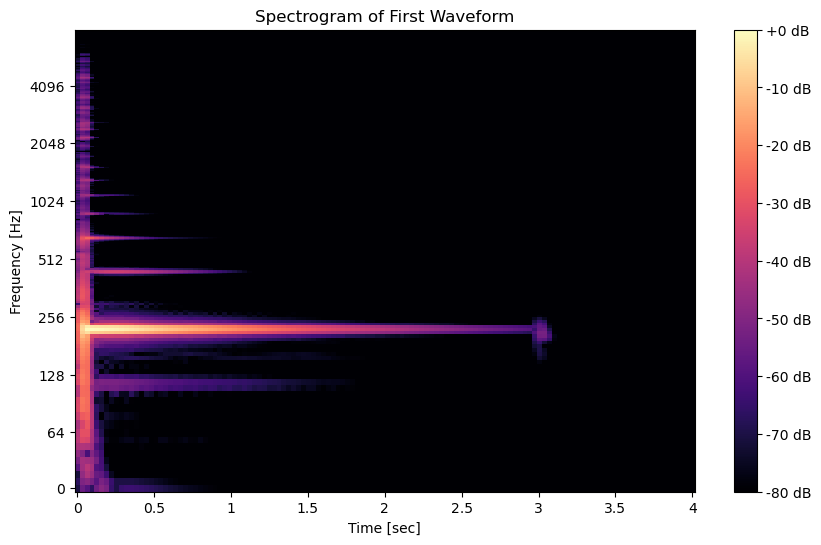

IndexError: list index out of range

In [15]:
#Generate a random waveform
instrument_list = [bass_electronic, flute_acoustic]
#Pick a random sample of each instrument
filepaths, labels = pick_samples_and_classify(instrument_list)
print(filepaths)
#Extract .wav data into to a list using librosa
waveforms = add_waveform_to_list(filepaths)

#Combine the waveforms
combined_waveform = combine_waveforms(waveforms)

# Convert the combined waveform to a spectrogram
spectrogram = waveform_to_spectogram(combined_waveform)

# Set all values lower than e-2 to 0
spectogram_0 = np.where(spectrogram < 1e-2, 0, spectrogram)
# Normalize the spectrogram
normalized_spectrogram = normalize_spectrogram(spectrogram)
normalized_spectrogram_0 = normalize_spectrogram(spectogram_0)
# Convert the normalized spectrogram back to audio and save it
spectogram_to_audio(spectogram_0, 16000, "combo1.wav")
spectogram_to_audio(spectrogram, 16000, "combo2.wav")

# Function to plot spectrogram using librosa
def plot_spectrogram(waveform, sr, title):
    # Compute the STFT
    D = librosa.stft(waveform)
    # Convert to magnitude
    D_mag = np.abs(D)
    print(D_mag.shape)
    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(librosa.amplitude_to_db(D_mag, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

# Plot the spectrograms for the individual waveforms
sr = 16000  # Assuming a sample rate of 16kHz

plot_spectrogram(waveforms[0], sr, 'Spectrogram of First Waveform')
plot_spectrogram(waveforms[1], sr, 'Spectrogram of Second Waveform')

# If you want to plot the spectrogram of the combined waveform as well
plot_spectrogram(combined_waveform, sr, 'Spectrogram of Combined Waveform')

In [14]:
print(len(guitar_acoustic))

1482


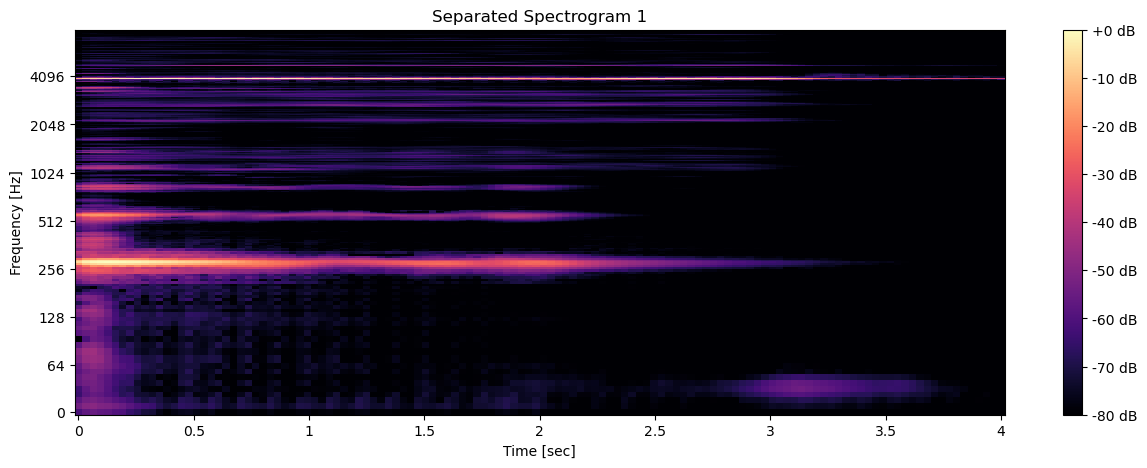

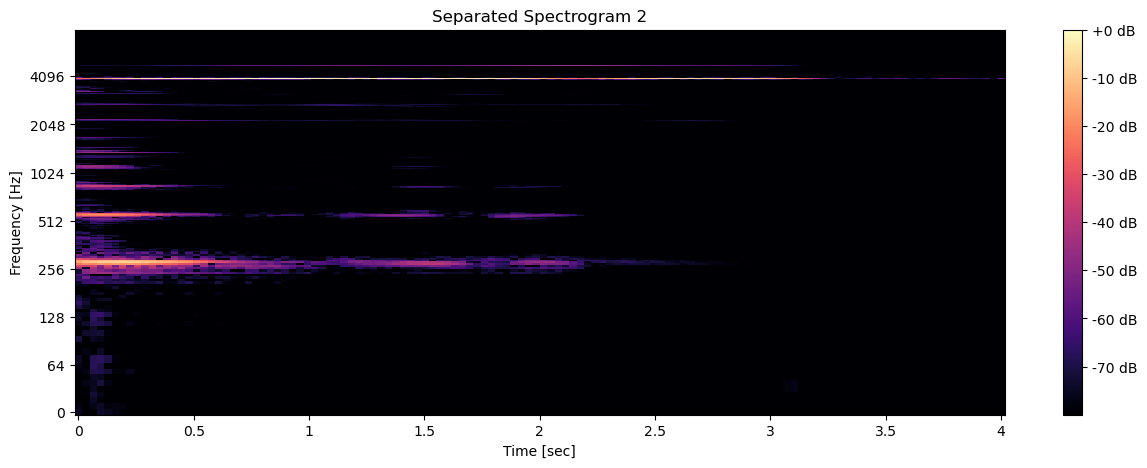

Saved output_audio\source_0.wav
Saved output_audio\source_1.wav


In [18]:
import torch
import numpy as np
import scipy.signal as signal
import wave
import soundfile as sf
import librosa
# Initialize and load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet_time(input_channels=1,output_channels=2).to(device, dtype=torch.float32)
model.load_state_dict(torch.load('your_model_weights_time.pth', map_location=device))
model.eval()


with wave.open('combo2.wav', 'rb') as wf:
    input_audio = wf.readframes(-1)
    input_sr = wf.getframerate()

#Load the combined audio waveform
combined_waveform, input_sr = librosa.load('combo2.wav', sr=None)

# Compute spectrogram using scipy signal
#f, t, Zxx = signal.spectrogram(combined_waveform, fs=input_sr, nperseg=256)
spectrogram = waveform_to_spectogram(combined_waveform)
#print(spectrogram.shape)
# Convert spectrogram to PyTorch tensor
input_tensor = torch.tensor(spectrogram, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device, dtype=torch.float32)  # Add batch and channel dimensions
#print(input_tensor[0])
# Pass input through the model to get predictions
with torch.no_grad():
    output_tensor = model(input_tensor)
# Renormalize the output tensor
def plot_separated_spectrograms(output_tensor, sr):
    for i, spec in enumerate(output_tensor):
        plt.figure(figsize=(15, 5))
        librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.title(f'Separated Spectrogram {i + 1}')
        plt.show()
        
# Convert output tensor to numpy array and save as audio files
output_tensor = output_tensor.squeeze().cpu().numpy()
#print(output_tensor[0])
# Plot the separated spectrograms
plot_separated_spectrograms(output_tensor, input_sr)
output_folder = "output_audio"
#print(output_tensor)
# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert each source back from spectrogram to audio and save
for i, source in enumerate(output_tensor):
    # Convert the spectrogram back to audio

    # Save as .wav file
    output_filepath = os.path.join(output_folder, f'source_{i}.wav')
    spectogram_to_audio(source, input_sr, output_filepath)
    print(f"Saved {output_filepath}")



In [19]:
#Plot the spectgram of the sum separated audio files subtracted from the original audio file

# Load the original audio file
original_waveform, sr = librosa.load('combo2.wav', sr=None)

# Load the separated audio files
separated_waveforms = []
for i in range(2):
    separated_waveform, sr = librosa.load(f'output_audio/source_{i}.wav', sr=None)
    separated_waveforms.append(separated_waveform)

# Sum the separated waveforms
sum_separated_waveform = np.sum(separated_waveforms, axis=0)

# Subtract the sum of the separated waveforms from the original waveform
diff_waveform =   sum_separated_waveform -original_waveform

# Compute the spectrogram of the difference waveform
diff_spectrogram = waveform_to_spectogram(diff_waveform)

# Plot the spectrogram of the difference waveform

plot_spectrogram(diff_waveform, sr, 'Spectrogram of Difference Waveform')

NameError: name 'plot_spectrogram' is not defined

In [72]:
36765/16000

2.2978125

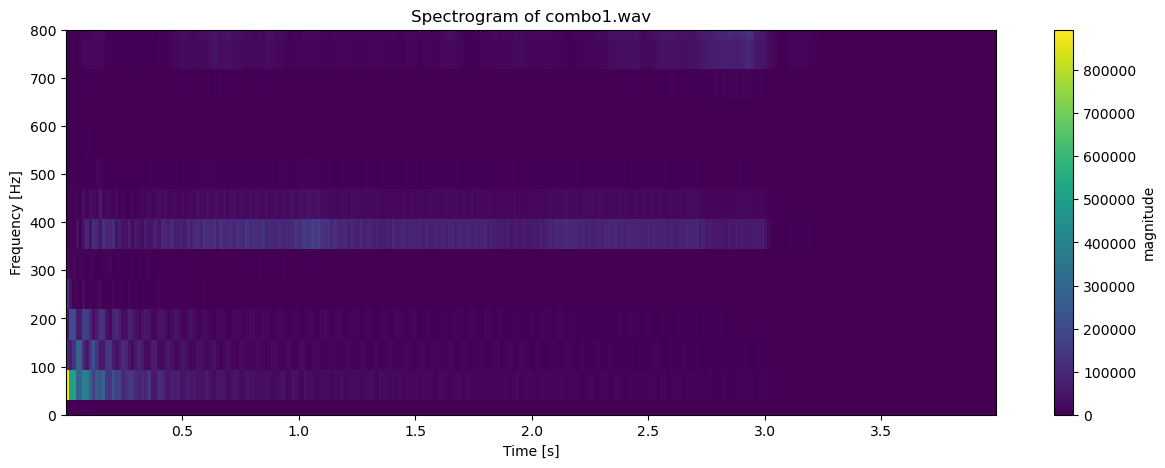

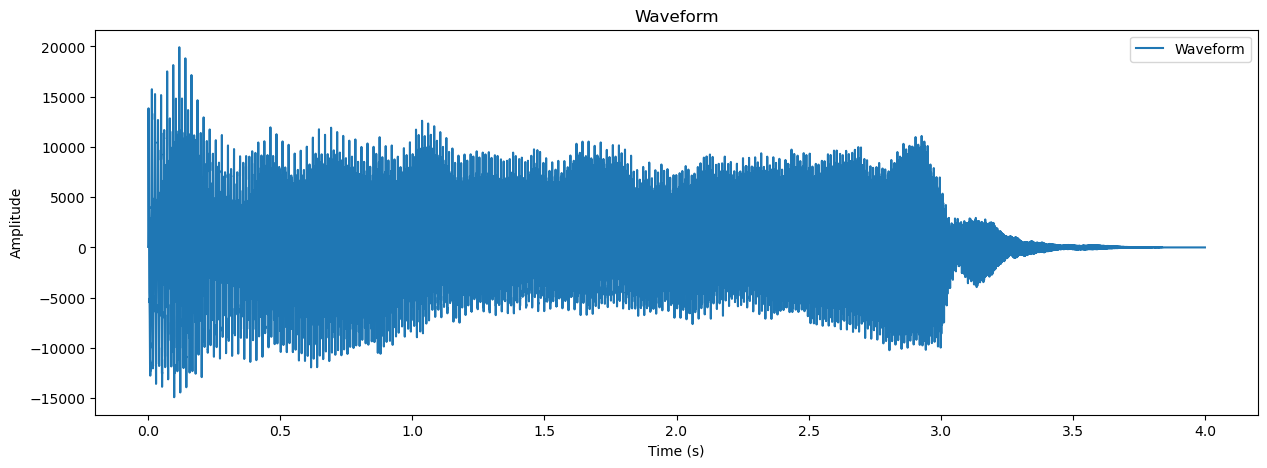

In [85]:
# Plot the spectrogram of combo1.wav
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

# Read the waveform from the .wav file
waveform, params = read_wav_file_scipy('combo1.wav')

# Compute the spectrogram
f, t, Zxx = signal.spectrogram(waveform, fs=16000)

# Plot the spectrogram
plt.figure(figsize=(15, 5))
plt.pcolormesh(t, f, Zxx)
plt.title('Spectrogram of combo1.wav')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.ylim(0,800)
plt.colorbar(label='magnitude')
plt.show()

# Plot the wave function of the .wav file
plot_waveform(waveform, 16000)



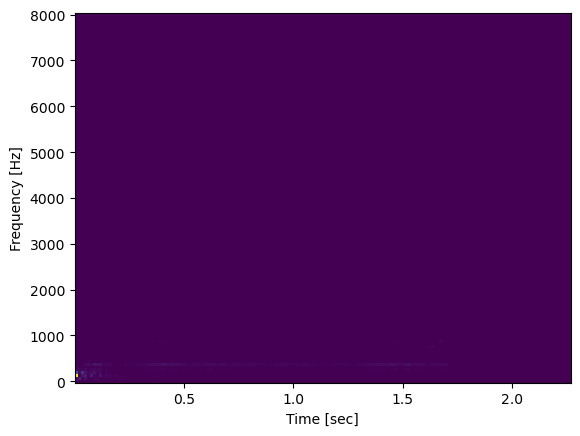

source_0.wav


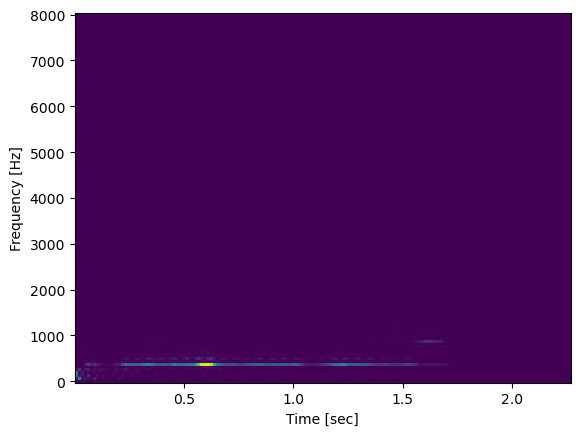

source_1.wav


In [86]:
file_list = read_files_in_dir("output_audio/")
for file in file_list:
    waveform, params = read_wav_file_scipy("output_audio/" + file)
    freq, time, spectro = signal.spectrogram(waveform, fs = 16000)
    plt.pcolormesh(time, freq, spectro)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    #plt.ylim(0,0.1)
    plt.show()
    print(file)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self, input_channels=1, output_channels=4):
        super(UNet, self).__init__()
        
        # Define the contracting/downsampling path
        self.conv1 = nn.Conv2d(input_channels, 16, (129, 3), padding=(64, 1))
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv6 = nn.Conv2d(256, 512, 3, padding=1)
        self.conv7 = nn.Conv2d(512, 1024, 3, padding=1)
        self.conv8 = nn.Conv2d(1024, 2048, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
        # Add transpose convolutional layers for upsampling
        self.upconv1 = nn.ConvTranspose2d(2048, 1024, 2, stride=2)
        self.conv9 = nn.Conv2d(2048, 1024, 3, padding=1)
        self.upconv2 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.conv10 = nn.Conv2d(1024, 512, 3, padding=1)
        self.upconv3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.conv11 = nn.Conv2d(512, 256, 3, padding=1)
        self.upconv4 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.conv12 = nn.Conv2d(256, 128, 3, padding=1)
        self.upconv5 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.conv13 = nn.Conv2d(128, 64, 3, padding=1)
        self.upconv6 = nn.ConvTranspose2d(64, 32, 2, stride=2)
        self.conv14 = nn.Conv2d(64, 32, 3, padding=1)
        self.upconv7 = nn.ConvTranspose2d(32, 16, 2, stride=2)
        self.conv15 = nn.Conv2d(32, 16, 3, padding=1)
        self.final_conv = nn.Conv2d(16, output_channels, 3, padding=1)

    def forward(self, x):
        # Contracting path
        x1 = F.relu(self.conv1(x))
        x2 = self.pool(F.relu(self.conv2(x1)))
        x3 = self.pool(F.relu(self.conv3(x2)))
        x4 = self.pool(F.relu(self.conv4(x3)))
        x5 = self.pool(F.relu(self.conv5(x4)))
        x6 = self.pool(F.relu(self.conv6(x5)))
        x7 = self.pool(F.relu(self.conv7(x6)))
        x8 = self.pool(F.relu(self.conv8(x7)))
        
        # Expanding path with skip connections
        x = self.upconv1(x8)
        x = F.interpolate(x, size=(x7.size(2), x7.size(3)), mode='bilinear', align_corners=True)
        x = torch.cat([x, x7], dim=1)
        x = F.relu(self.conv9(x))

        x = self.upconv2(x)
        x = F.interpolate(x, size=(x6.size(2), x6.size(3)), mode='bilinear', align_corners=True)
        x = torch.cat([x, x6], dim=1)
        x = F.relu(self.conv10(x))

        x = self.upconv3(x)
        x = F.interpolate(x, size=(x5.size(2), x5.size(3)), mode='bilinear', align_corners=True)
        x = torch.cat([x, x5], dim=1)
        x = F.relu(self.conv11(x))

        x = self.upconv4(x)
        x = F.interpolate(x, size=(x4.size(2), x4.size(3)), mode='bilinear', align_corners=True)
        x = torch.cat([x, x4], dim=1)
        x = F.relu(self.conv12(x))

        x = self.upconv5(x)
        x = F.interpolate(x, size=(x3.size(2), x3.size(3)), mode='bilinear', align_corners=True)
        x = torch.cat([x, x3], dim=1)
        x = F.relu(self.conv13(x))

        x = self.upconv6(x)
        x = F.interpolate(x, size=(x2.size(2), x2.size(3)), mode='bilinear', align_corners=True)
        x = torch.cat([x, x2], dim=1)
        x = F.relu(self.conv14(x))

        x = self.upconv7(x)
        x = F.interpolate(x, size=(x1.size(2), x1.size(3)), mode='bilinear', align_corners=True)
        x = torch.cat([x, x1], dim=1)
        x = F.relu(self.conv15(x))

        x = self.final_conv(x)
        return x

# Example usage:
# model = UNet(input_channels=1, output_channels=4)
# print(model)
